In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_community.llms import Ollama
from typing import TypedDict

In [2]:
# Ollama llama3 model
model=Ollama(model="llama3")

C:\Users\Ashish\AppData\Local\Temp\ipykernel_2016\3613330992.py:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  model=Ollama(model="llama3")


In [3]:
# create StateGraph
class blogstate(TypedDict):
    title: str
    outline: str
    content:str
    

In [4]:
#define graph
graph=StateGraph(blogstate)

In [5]:
# function to create outline
def create_title(state:blogstate)->blogstate:
    #fetch title
    title = state['title']
    #promt
    promt=f"create outline for blog from given title {title}"
    #model
    outline_result=model.invoke(promt)
    # save in stategraph
    state['outline']=outline_result
    return state


In [6]:
# function to create blog
def create_content(state:blogstate)->blogstate:
    #fetch 
    title=state['title']
    outline=state['outline']
    #promt
    promt=f"create blog from given title {title} and outline {outline}"
    #model
    blog_result=model.invoke(promt)
    #save in state
    state['content']=blog_result
    return state


In [7]:
# define node
graph.add_node("create_title",create_title)
graph.add_node("create_content",create_content)

In [8]:
#create edge
graph.add_edge(START,"create_title")
graph.add_edge("create_title","create_content")
graph.add_edge("create_content",END)

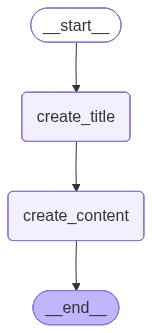

In [9]:
graph.compile()

In [10]:
promt_chain_workflow=graph.compile()

In [14]:
output_result=promt_chain_workflow.invoke({'title':'Rise of India.'})

In [15]:
print(output_result)

{'title': 'Rise of India.', 'outline': 'Here is a suggested outline for a blog on the topic "Rise of India":\n\n**I. Introduction**\n\n* Brief overview of India\'s growth and transformation in recent years\n* Thesis statement: India\'s rise to global prominence is driven by its growing economy, technological advancements, and increasing international influence.\n\n**II. Economic Growth**\n\n* Overview of India\'s economic reforms and their impact on GDP growth (e.g. liberalization, privatization)\n* Statistics on India\'s economic growth rate (e.g. 7%+ per annum) and its ranking in the world economy\n* Examples of Indian companies that have made a global impact (e.g. Tata Motors, Infosys)\n\n**III. Technological Advancements**\n\n* Discussion of India\'s growing IT sector and its role in driving innovation (e.g. Bangalore, Silicon Valley of India)\n* Overview of India\'s space program and its achievements (e.g. Chandrayaan-1, Mangalyaan)\n* Examples of Indian startups that have gained 

In [20]:
print(output_result['title'])

Rise of India.


In [19]:
print(output_result['outline'])

Here is a suggested outline for a blog on the topic "Rise of India":

**I. Introduction**

* Brief overview of India's growth and transformation in recent years
* Thesis statement: India's rise to global prominence is driven by its growing economy, technological advancements, and increasing international influence.

**II. Economic Growth**

* Overview of India's economic reforms and their impact on GDP growth (e.g. liberalization, privatization)
* Statistics on India's economic growth rate (e.g. 7%+ per annum) and its ranking in the world economy
* Examples of Indian companies that have made a global impact (e.g. Tata Motors, Infosys)

**III. Technological Advancements**

* Discussion of India's growing IT sector and its role in driving innovation (e.g. Bangalore, Silicon Valley of India)
* Overview of India's space program and its achievements (e.g. Chandrayaan-1, Mangalyaan)
* Examples of Indian startups that have gained international attention (e.g. Paytm, Ola)

**IV. Increasing Int

In [21]:
print(output_result['content'])

**Rise of India: A New Era of Growth and Influence**

As the world's second-most populous nation, India has been making rapid strides in various aspects of its economy, technology, and international influence. This blog post will explore the rise of India as a global powerhouse, highlighting its economic growth, technological advancements, increasing international influence, and the challenges and opportunities that come with it.

**I. Introduction**

India's transformation is nothing short of remarkable. Over the past two decades, the country has experienced unprecedented economic growth, driven by liberalization, privatization, and a favorable business environment. This growth has been accompanied by significant technological advancements, innovative startups, and an increasing international influence that is redefining India's place on the global stage.

**II. Economic Growth**

India's economic reforms have been instrumental in driving its GDP growth rate to over 7% per annum. The 